In [4]:
# 1.1 Data handling
import pandas as pd
import numpy as np

# 1.2 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1.3 Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# 1.4 Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# 1.5 Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# 1.6 Handling class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Change: use imblearn Pipeline for safe SMOTE integration

# 1.7 Utilities
import joblib
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Load dataset
df = pd.read_csv("../Loan_default_prediction.csv")

# Display first rows
df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
# Display last rows
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [7]:
# Dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [8]:

df.describe()
df.isnull().mean().sort_values(ascending=False)


LoanID            0.0
Age               0.0
HasCoSigner       0.0
LoanPurpose       0.0
HasDependents     0.0
HasMortgage       0.0
MaritalStatus     0.0
EmploymentType    0.0
Education         0.0
DTIRatio          0.0
LoanTerm          0.0
InterestRate      0.0
NumCreditLines    0.0
MonthsEmployed    0.0
CreditScore       0.0
LoanAmount        0.0
Income            0.0
Default           0.0
dtype: float64

In [9]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

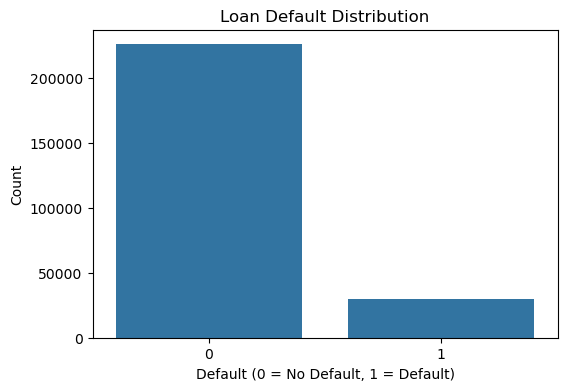

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Default"].astype(str))
plt.title("Loan Default Distribution")
plt.xlabel("Default (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.show()

# Percentage distribution
df["Default"].value_counts(normalize=True) * 100


In [11]:
# Separate features and target
X = df.drop(columns=["LoanID", "Default"])
y = df["Default"]


# Identify column types
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()


In [12]:
# Threshold to distinguish low vs high cardinality
LOW_CARD_THRESHOLD = 10

low_cardinality_cols = [
    col for col in categorical_cols if X[col].nunique() <= LOW_CARD_THRESHOLD
]

high_cardinality_cols = [
    col for col in categorical_cols if X[col].nunique() > LOW_CARD_THRESHOLD
]

# Display split
low_cardinality_cols, high_cardinality_cols


(['Education',
  'EmploymentType',
  'MaritalStatus',
  'HasMortgage',
  'HasDependents',
  'LoanPurpose',
  'HasCoSigner'],
 [])

In [13]:
# 5.1 Numeric features: median imputation + scaling
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 5.2 Low-cardinality categorical: One-Hot Encoding → dense array
low_cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # FIX: dense output
])

# 5.3 High-cardinality categorical: Ordinal Encoding
high_cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

# 5.4 Combine all preprocessing
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_cols),
    ("low_cat", low_cat_pipeline, low_cardinality_cols),
    ("high_cat", high_cat_pipeline, high_cardinality_cols)
])


In [41]:
# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE safely on training set only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(
    preprocessor.fit_transform(X_train), y_train
)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())


Before SMOTE: Default
0    180555
1     23722
Name: count, dtype: int64
After SMOTE: Default
0    180555
1    180555
Name: count, dtype: int64


In [43]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(
    n_estimators=80,          # ↓ from 200
    max_depth=12,             # LIMIT tree growth
    min_samples_leaf=10,      # Prevent huge trees
    n_jobs=-1,
    random_state=42,
    class_weight="balanced"
),
    "Linear SVM": LinearSVC(class_weight="balanced", max_iter=2000),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300, random_state=42)
}

pipelines = {}

for name, model in models.items():
    # 7.1 Use ImbPipeline to safely include SMOTE
    # FIX: MLP now works because preprocessor outputs dense arrays
    pipelines[name] = ImbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("model", model)
    ])


Training Logistic Regression...


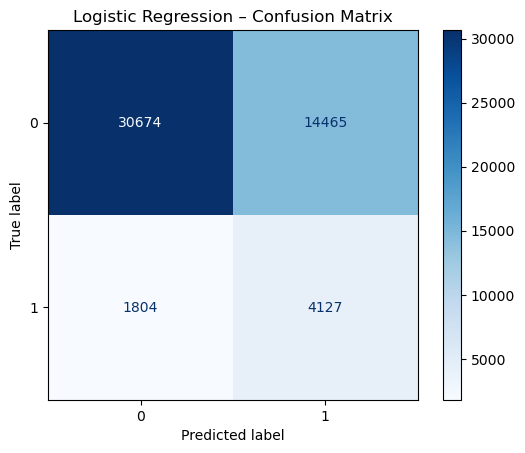

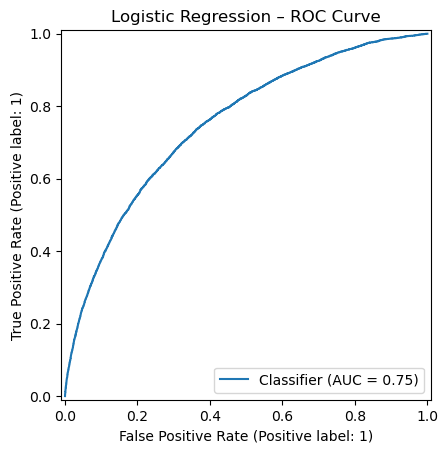

Training Random Forest...


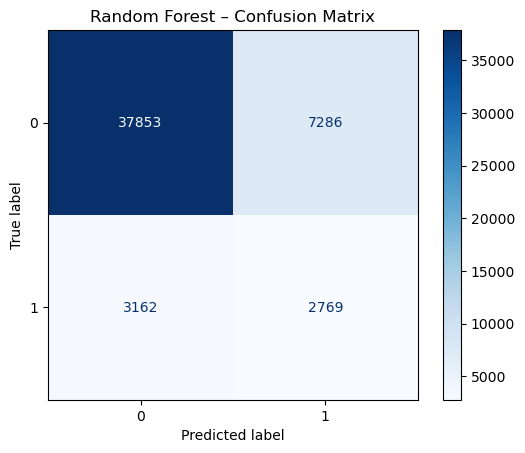

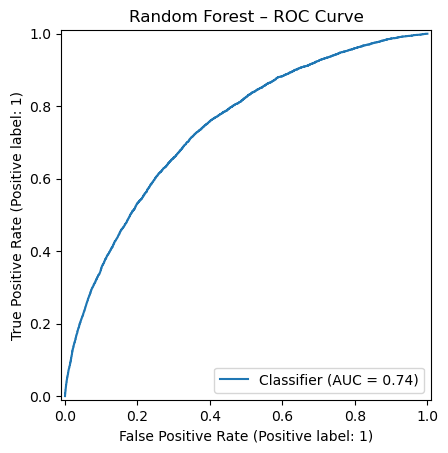

Training Linear SVM...


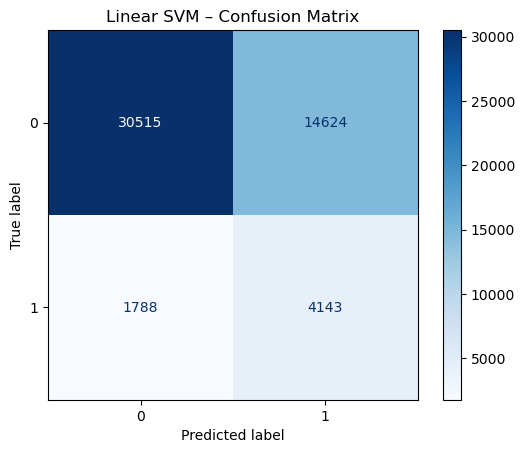

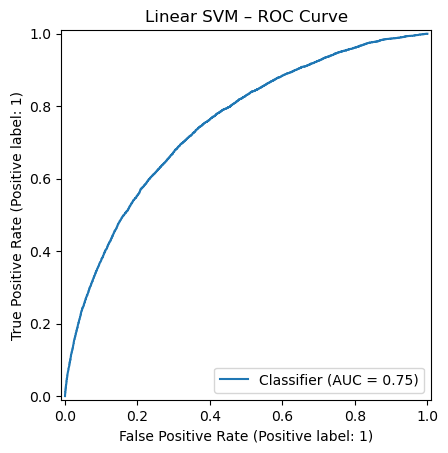

Training Neural Network (MLP)...


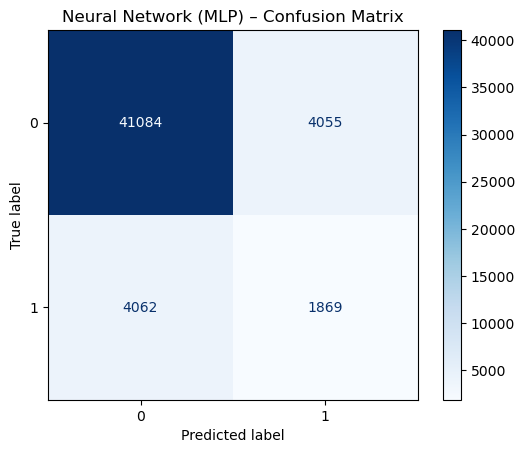

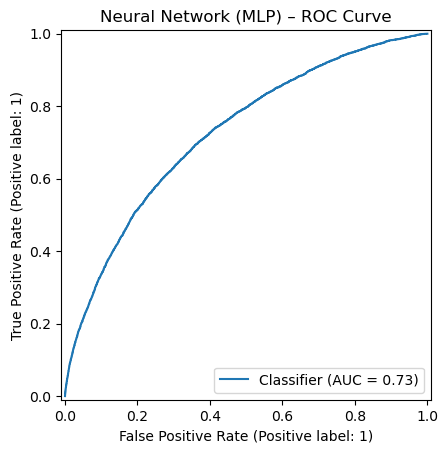

In [45]:
metrics = []

for name, pipeline in pipelines.items():
    print(f"Training {name}...")

    # 8.1 Train pipeline (preprocessing + SMOTE + model)
    pipeline.fit(X_train, y_train)

    # 8.2 Predict
    y_pred = pipeline.predict(X_test)

    # 8.3 Probability / decision score for ROC
    model_obj = pipeline.named_steps['model']
    if hasattr(model_obj, "predict_proba"):
        y_score = pipeline.predict_proba(X_test)[:,1]
    else:  # LinearSVC
        y_score = pipeline.decision_function(X_test)
        y_score = StandardScaler().fit_transform(y_score.reshape(-1,1)).ravel()

    # 8.4 Store metrics
    metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_score)
    })

    # 8.5 Visualize
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
    plt.title(f"{name} – Confusion Matrix")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, y_score)
    plt.title(f"{name} – ROC Curve")
    plt.show()

    # 8.6 Save pipeline
    filename = f"../web_app/models/{name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(pipeline, filename)


In [47]:
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("../web_app/model_metrics.csv", index=False)
metrics_df


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.681437,0.221977,0.695835,0.336582,0.751699
1,Random Forest,0.795418,0.275385,0.466869,0.346428,0.743449
2,Linear SVM,0.678637,0.220760,0.698533,0.335493,0.751730
3,Neural Network (MLP),0.841061,0.315496,0.315124,0.315310,0.725708
